## Các thư viện cần thiết

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('../Project/Data/raw_data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 01. Exploring Data (row, column, dtypes):

Dữ liệu có bao nhiêu dòng và cột ?


In [34]:
print(f'The number of rows : {df.shape[0]}')
print(f'The number of columns : {df.shape[1]}')

The number of rows : 48895
The number of columns : 16


Ý nghĩa của từng dòng là gì ?
- Each row is the infomation of each listing

Có tồn tại dòng nào bị trùng lắp không ?


In [35]:
print(df.duplicated().sum())

0


Ý nghĩa của từng cột là gì ?


| Column name     | Meaning |
| :---        |    :----   |
| id      | ID of the listing      |
| name   | The name of the listing        |
| host_id      | ID of the host      |
| host_name   | Name of the host        |
| neighbourhood_group      | The group of neighbourhood area around the listing       |
| neighbourhood   | The neighbourhood area around the listing          |
| latitude      | The latitude of place of listing (from the World Geodetic System(WGS84))       |
| longitude   |  The longtitude of place of listing (from the World Geodetic System(WGS84))       |
| room_type   | The type of room        |
| price      | The price of listing      |
| minimum_nights      | The minimum nights to order        |
| number_of_reviews   | The number of reviews for this listing        |
| last_review      | The date of latest reviews for this listing       |
| reviews_per_month   | The average number of reviews for this listing per month    |
| calculated_host_listings_count   | The number of listings the host has in the curent scrape       |
| availability_365   | The availability of the listing 365 days in the future as determined by the calendar       |


Kiểu dữ liệu hiện tại của từng cột là gì ? Có tồn tại những cột nào có kiểu dữ liệu không phù hợp hay không ?

In [36]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Để hiểu rõ hơn về các cột có kiểu là object, ta sẽ phân tích ra thành từng kiểu con

In [37]:
def open_object_col(col):
    return (set(col.apply(type)))

In [38]:
df.apply(open_object_col)

id                                                 {<class 'int'>}
name                              {<class 'str'>, <class 'float'>}
host_id                                            {<class 'int'>}
host_name                         {<class 'str'>, <class 'float'>}
neighbourhood_group                                {<class 'str'>}
neighbourhood                                      {<class 'str'>}
latitude                                         {<class 'float'>}
longitude                                        {<class 'float'>}
room_type                                          {<class 'str'>}
price                                              {<class 'int'>}
minimum_nights                                     {<class 'int'>}
number_of_reviews                                  {<class 'int'>}
last_review                       {<class 'str'>, <class 'float'>}
reviews_per_month                                {<class 'float'>}
calculated_host_listings_count                     {<class 'in

Các cột phù hợp và không phù hợp về kiểu dữ liệu

- Column id, host_id, neighbourhood_group, neighbourhood, latitude,longtitude, room_type, price, minimum_nights, number_of_reviews,review_per_month, calculated_host_listings_count and availability_365 have a right data type.
- Column name, host_name need to convert into string
- Column last_review need to convert into datetime

## 02. Pre-processing Data:


Chuyển về kiểu dữ liệu thích hợp:


In [39]:
df[['name', 'host_name']] = df[['name', 'host_name']].replace(to_replace=np.nan, value='')
df['last_review'] = pd.to_datetime(df['last_review'],format='%Y-%m-%d')

In [40]:
df.apply(open_object_col)

id                                                                  {<class 'int'>}
name                                                                {<class 'str'>}
host_id                                                             {<class 'int'>}
host_name                                                           {<class 'str'>}
neighbourhood_group                                                 {<class 'str'>}
neighbourhood                                                       {<class 'str'>}
latitude                                                          {<class 'float'>}
longitude                                                         {<class 'float'>}
room_type                                                           {<class 'str'>}
price                                                               {<class 'int'>}
minimum_nights                                                      {<class 'int'>}
number_of_reviews                                                   {<class 

Handle missing value

Save to CSV file


## 03. Exploring Data (phân bổ dữ liệu):

### Numerical data

In [41]:
numerical_col = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','last_review']

In [64]:
df[numerical_col].describe()[2:7]

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review
min,0.0,1.0,0.0,0.01,1.0,0.0,2011-03-28 00:00:00
25%,69.0,1.0,1.0,0.19,1.0,0.0,2018-07-08 00:00:00
50%,106.0,3.0,5.0,0.72,1.0,45.0,2019-05-19 00:00:00
75%,175.0,5.0,24.0,2.02,2.0,227.0,2019-06-23 00:00:00
max,10000.0,1250.0,629.0,58.50,327.0,365.0,2019-07-08 00:00:00


Analyze price

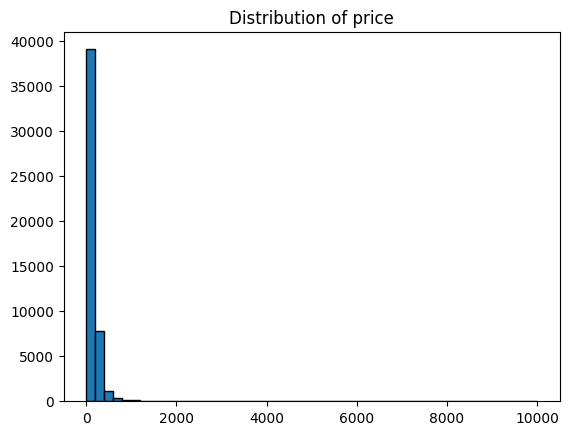

In [43]:
plt.hist(df['price'],bins=50,edgecolor='black')
plt.title('Distribution of price')
plt.show()

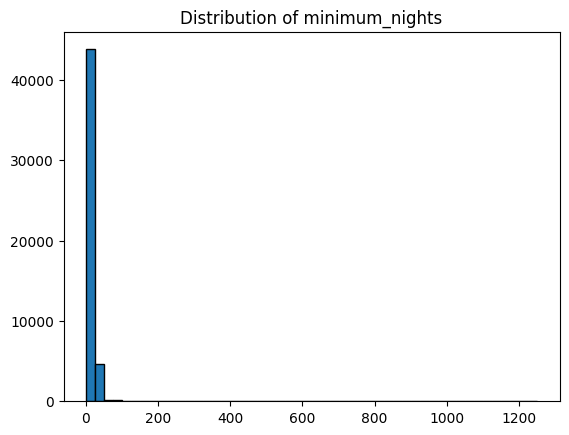

In [44]:
plt.hist(df['minimum_nights'],bins=50,edgecolor='black')
plt.title('Distribution of minimum_nights')
plt.show()

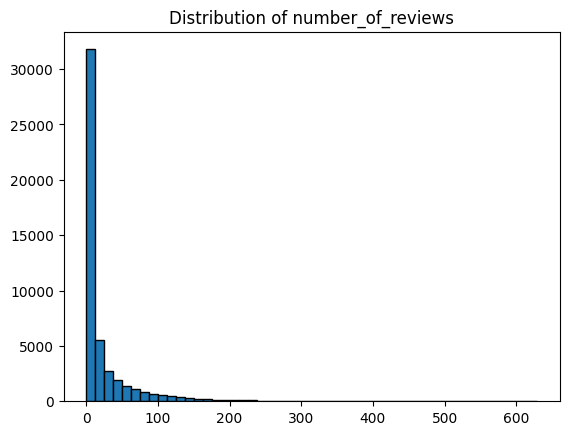

In [45]:
plt.hist(df['number_of_reviews'],bins=50,edgecolor='black')
plt.title('Distribution of number_of_reviews')
plt.show()

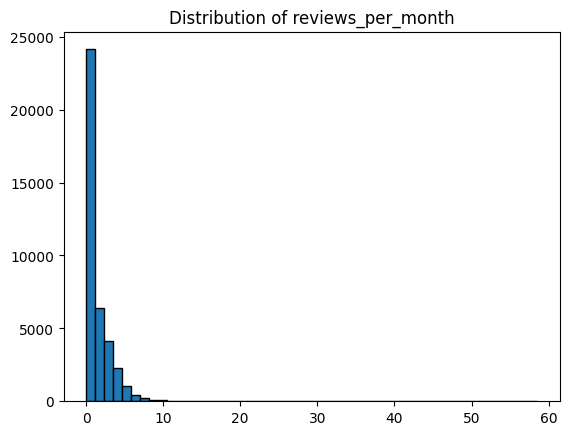

In [46]:
plt.hist(df['reviews_per_month'],bins=50,edgecolor='black')
plt.title('Distribution of reviews_per_month')
plt.show()

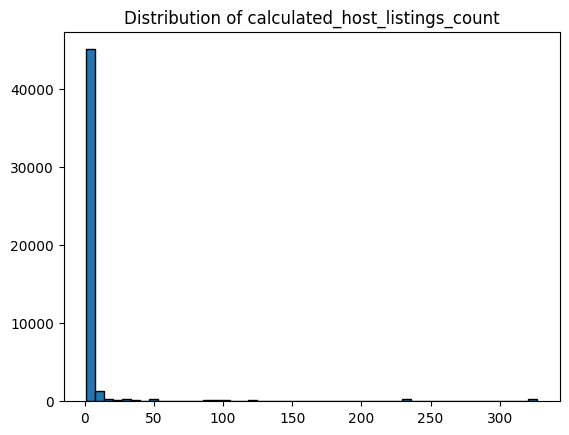

In [47]:
plt.hist(df['calculated_host_listings_count'],bins=50,edgecolor='black')
plt.title('Distribution of calculated_host_listings_count')
plt.show()

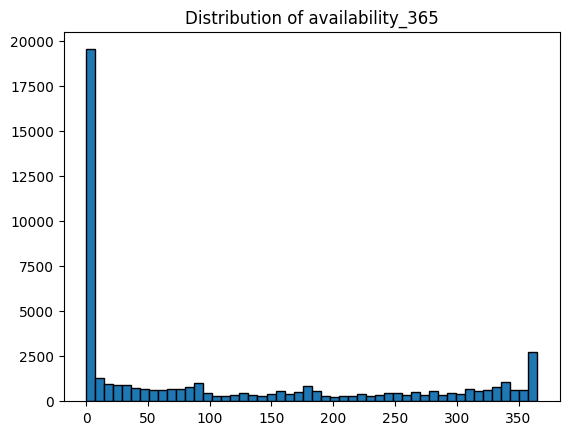

In [48]:
plt.hist(df['availability_365'],bins=50,edgecolor='black')
plt.title('Distribution of availability_365')
plt.show()

### Categorical data

In [49]:
df.select_dtypes(include='object').columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')

In [50]:
cate_col = ['neighbourhood_group', 'neighbourhood','room_type']

#### Analyzing neighbourhood_group


In [51]:
neighbourhood_group_df = df['neighbourhood_group']
neighbourhood_group_df.to_frame()

,neighbourhood_group
0,Brooklyn
1,Manhattan
2,Manhattan
3,Brooklyn
4,Manhattan
...,...
48890,Brooklyn
48891,Brooklyn
48892,Manhattan
48893,Manhattan


In [52]:
neighbourhood_group_count = neighbourhood_group_df.value_counts()
neighbourhood_group_count

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

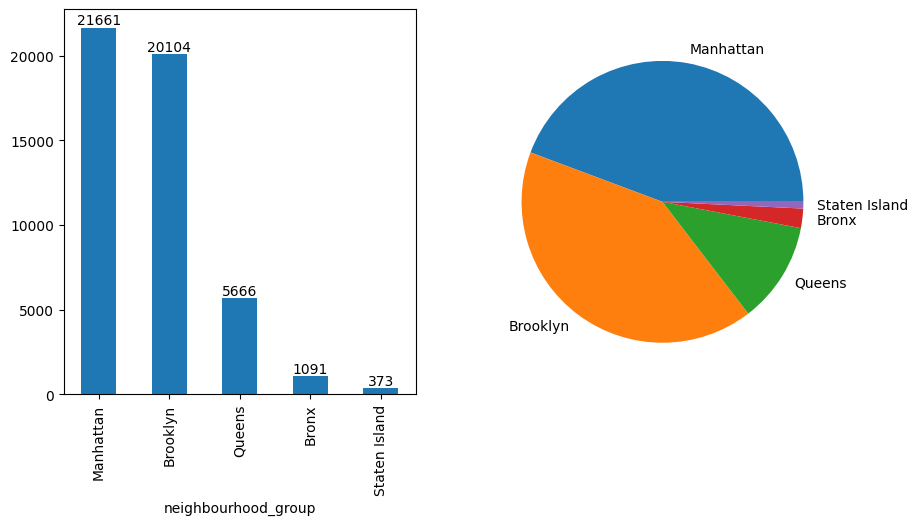

In [53]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
neighbourhood_group_count.plot(kind='bar', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])

neighbourhood_group_count.plot(kind='pie', ax=ax[1])
ax[1].set_ylabel(None)
plt.show()

#### Analyzing neighbourhood


In [54]:
neighbourhood_df = df['neighbourhood']
neighbourhood_df.to_frame()

,neighbourhood
0,Kensington
1,Midtown
2,Harlem
3,Clinton Hill
4,East Harlem
...,...
48890,Bedford-Stuyvesant
48891,Bushwick
48892,Harlem
48893,Hell's Kitchen


In [55]:
neighbourhood_count = neighbourhood_df.value_counts()
neighbourhood_count

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

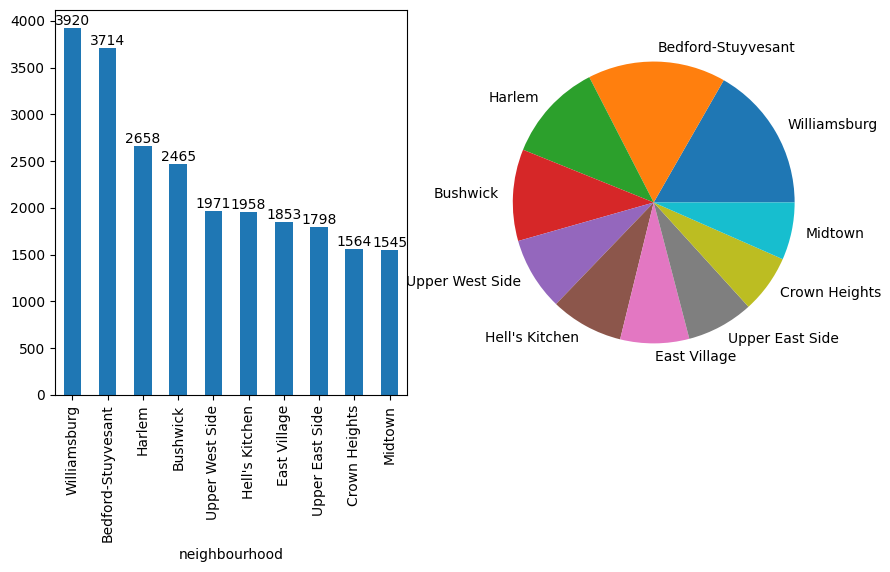

In [56]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
neighbourhood_count[:10].plot(kind='bar', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])

neighbourhood_count[:10].plot(kind='pie', ax=ax[1])
ax[1].set_ylabel(None)
plt.show()

#### Analyzing room_type

In [57]:
room_type_df = df['room_type']
room_type_df.to_frame()

,room_type
0,Private room
1,Entire home/apt
2,Private room
3,Entire home/apt
4,Entire home/apt
...,...
48890,Private room
48891,Private room
48892,Entire home/apt
48893,Shared room


In [58]:
room_type_count = room_type_df.value_counts()
room_type_count

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

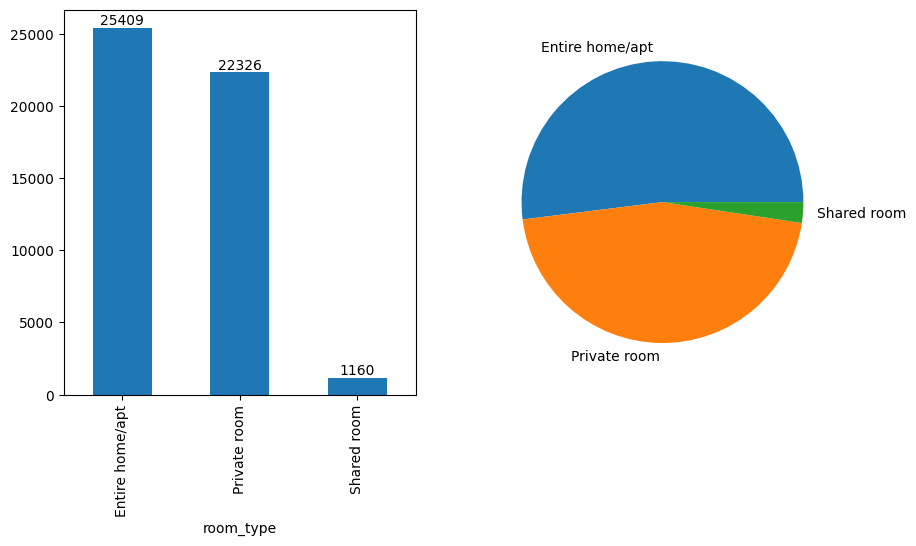

In [59]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
room_type_count.plot(kind='bar', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])

room_type_count.plot(kind='pie', ax=ax[1])
ax[1].set_ylabel(None)
plt.show()